In [1]:
# this path append is for binder only
import sys
sys.path.append("../../")

#spectrome modules
# from spectrome.forward import runforward, runforward_spatialcorrelation_topalpha
from spectrome.utils import functions, path
from spectrome.brain import Brain
from spectrome.stability import localstability_microintensity_allrois
# from spectrome.stability import localstability
# from spectrome.forward import network_transfer_macrostable_microintensity_extrastimulus as nt
# from spectrome.forward import network_transfer_macrostable_microintensity as nt_nostimulus
from spectrome.forward import network_transfer_macrostable as nt
from spectrome.forward import runforward_spatialcorrelation_mahalanobis 
from spectrome.forward import runforward_spatialcorrelation_old
from spectrome.forward import runforward_spatialcorrelation_topalpha
from spectrome.forward import runforward_spatialcorrelation_adjacency

#generic modules
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import pickle as pkl
from scipy import stats
from scipy.stats import pearsonr
from scipy.io import loadmat
from sklearn.preprocessing import minmax_scale

pd.DataFrame.iteritems = pd.DataFrame.items

plt.rcParams.update({
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

In [2]:
# cortical areas with MEG collected + source reconstructed
rois_with_MEG = np.arange(0,68)

ind_psd_xr = xr.open_dataarray('../data/individual_psd_reordered_matlab.nc')
ind_psd = ind_psd_xr.values

ind_conn_xr = xr.open_dataarray('../data/individual_connectomes_reordered.nc')
ind_conn = ind_conn_xr.values

ind_regions = ind_conn_xr["regionx"].values

fvec = ind_psd_xr["frequencies"].values

nsubs_chang = len(ind_psd[0,0,:])

sleep = loadmat('/data/rajlab1/user_data/parul/sleep_files/PSD_pmtm_50Hz_DK_relative_reordered.mat')
print("Loaded sleep data", flush= True)

Data = sleep['PSD_reordered']

N2 = Data[:,1]
wake = Data[:,3]

temp = np.squeeze(N2[0][0])

fvec_sleep = temp['freqs'][0][:,0]

# Take frequencies till 35 Hz
fvec_sleep = fvec_sleep[0:45]

temp = np.squeeze(N2[0][0])
psd_N2 = temp['psdx']

print("shape of N2:", psd_N2.shape)

nsubs_sleep = len(psd_N2)

temp = np.squeeze(wake[0][0])
psd_wake = temp['psdx']

Loaded sleep data
shape of N2: (18,)


In [3]:
orgsgm_hcp_sc = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_newspatcost_5percentile/orgSGM_chang_hcptemplate.csv",delimiter=",")
orgsgm_mica_sc = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_newspatcost_5percentile/orgSGM_chang_micatemplate.csv",delimiter=",")
orgsgm_ind_sc = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_newspatcost_5percentile/orgSGM_chang_ind.csv",delimiter=",")

orgsgm_wake_sc =  np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_newspatcost_5percentile/sleep_wake_DK_45Hz.csv", delimiter=",")
orgsgm_N2_sc = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_newspatcost_5percentile/sleep_N2_DK_45Hz.csv", delimiter=",")


orgsgm_hcp_adj = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_adjacencyspatcost_5percentile/orgSGM_chang_hcptemplate.csv",delimiter=",")
orgsgm_mica_adj = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_adjacencyspatcost_5percentile/orgSGM_chang_micatemplate.csv",delimiter=",")
orgsgm_ind_adj = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_adjacencyspatcost_5percentile/orgSGM_chang_ind.csv",delimiter=",")

orgsgm_wake_adj =  np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_adjacencyspatcost_5percentile/sleep_wake_DK_45Hz.csv", delimiter=",")
orgsgm_N2_adj = np.loadtxt("/data/rajlab1/user_data/parul/spectromeP_results/results_globalSGM/alpha_experiments/noreducedC_Cnormalized_adjacencyspatcost_5percentile/sleep_N2_DK_45Hz.csv", delimiter=",")


In [4]:
orgsgm_hcp_sc_sorted = orgsgm_hcp_sc[np.argsort(orgsgm_hcp_sc[:,10])]
orgsgm_ind_sc_sorted = orgsgm_ind_sc[np.argsort(orgsgm_ind_sc[:,10])]
orgsgm_mica_sc_sorted = orgsgm_mica_sc[np.argsort(orgsgm_mica_sc[:,10])]

orgsgm_wake_sc_sorted = orgsgm_wake_sc[np.argsort(orgsgm_wake_sc[:,10])]
orgsgm_N2_sc_sorted = orgsgm_N2_sc[np.argsort(orgsgm_N2_sc[:,10])]


orgsgm_hcp_adj_sorted = orgsgm_hcp_adj[np.argsort(orgsgm_hcp_adj[:,10])]
orgsgm_ind_adj_sorted = orgsgm_ind_adj[np.argsort(orgsgm_ind_adj[:,10])]
orgsgm_mica_adj_sorted = orgsgm_mica_adj[np.argsort(orgsgm_mica_adj[:,10])]


orgsgm_wake_adj_sorted = orgsgm_wake_adj[np.argsort(orgsgm_wake_adj[:,10])]
orgsgm_N2_adj_sorted = orgsgm_N2_adj[np.argsort(orgsgm_N2_adj[:,10])]

In [5]:
w_chosen = orgsgm_hcp_sc_sorted
df_orgsgm_hcp_sc=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'hcp', 'model':'orgSGM'})

w_chosen = orgsgm_ind_sc_sorted
df_orgsgm_ind_sc=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'ind', 'model':'orgSGM'})

w_chosen = orgsgm_mica_sc_sorted
df_orgsgm_mica_sc=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'mica', 'model':'orgSGM'})


w_chosen = orgsgm_wake_sc_sorted
df_orgsgm_wake_sc=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'wake', 'model':'orgSGM'})

w_chosen = orgsgm_N2_sc_sorted
df_orgsgm_N2_sc=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'N2', 'model':'orgSGM'})


w_chosen = orgsgm_hcp_adj_sorted
df_orgsgm_hcp_adj=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'hcp', 'model':'orgSGM'})

w_chosen = orgsgm_ind_adj_sorted
df_orgsgm_ind_adj=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'ind', 'model':'orgSGM'})

w_chosen = orgsgm_mica_adj_sorted
df_orgsgm_mica_adj=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'mica', 'model':'orgSGM'})


w_chosen = orgsgm_wake_adj_sorted
df_orgsgm_wake_adj=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'wake', 'model':'orgSGM'})

w_chosen = orgsgm_N2_adj_sorted
df_orgsgm_N2_adj=pd.DataFrame({'tau_e':w_chosen[:,0], 'tau_i':w_chosen[:,1], 'alpha':w_chosen[:,2], 'speed':w_chosen[:,3], 'gei':w_chosen[:,4], 'gii':w_chosen[:,5], 'tauC':w_chosen[:,6], 'spectral':w_chosen[:,8], 'spatial':w_chosen[:,9], 'conn':'N2', 'model':'orgSGM'})


In [6]:
def getpsd(cdk,psd,rois_with_MEG,fvec,s,df_in, stimulus_roi, w_var, w_means, conn, data):

    C_ind = cdk[:,:,s] # grab current subject's individual connectome
    
    if data == 'chang':
        F_ind = psd[:,:,s] # grab current subject's MEG
    if data == 'sleep':
        F_ind = psd[s][:,0:45]
        
    F_ind_db = 10*np.log10(F_ind)

    data_dir = path.get_data_path()
    # # create spectrome brain:
    brain = Brain.Brain()
    brain.add_connectome(data_dir) # grabs distance matrix
    # # re-ordering for DK atlas and normalizing the connectomes:
    brain.reorder_connectome(brain.connectome, brain.distance_matrix)
    
    if conn == 'hcp':
        brain.connectome = brain.connectome
    if conn == 'ind':
        brain.connectome = C_ind
    if conn == 'mica':
        sc_dk_mica = loadmat("/data/rajlab1/shared_data/datasets/MICA/mica_sc_dt_aparc_nocorpuscollusum.mat")
        brain.connectome = sc_dk_mica['SC_mean']
        brain.distance_matrix = sc_dk_mica['DT_mean']

    brain.reducedConnectome = brain.connectome

    brain.ntf_params["tau_e"] = df_in['tau_e'][s]/1000
    brain.ntf_params["tau_i"] = df_in['tau_i'][s]/1000
    brain.ntf_params["alpha"] = df_in['alpha'][s]
    brain.ntf_params["speed"] = df_in['speed'][s]
    brain.ntf_params["gei"] = df_in['gei'][s]
    brain.ntf_params["gii"] = df_in['gii'][s]
    brain.ntf_params["tauC"] = df_in['tauC'][s]/1000
    
    
    freqband = np.where((fvec>=8) & (fvec<=12))[0]

    eigvec_ns = np.zeros((len(rois_with_MEG),len(freqband)))
    eigvec_ns_db = np.zeros((len(rois_with_MEG),len(freqband)))

    for i in range(len(freqband)):
        w = 2 * np.pi * fvec[freqband[i]]
        eigenvectors_ns, _, _, _ = nt.network_transfer_local_alpha(
            brain, brain.ntf_params, w, stimulus_roi, w_var, w_means
        )

        eigvec_ns[:,i] = eigenvectors_ns[rois_with_MEG]
        eigvec_ns_db[:,i] = 20*np.log10(eigenvectors_ns)[rois_with_MEG]

    eigvec_ns_summed = np.sum(eigvec_ns,axis = 1)
    eigvec_ns_summed_db = np.sum(eigvec_ns_db,axis = 1)
    
    eigvec_ns_summed = eigvec_ns_summed/np.linalg.norm(eigvec_ns_summed)
    eigvec_ns_summed_db = eigvec_ns_summed_db/np.linalg.norm(eigvec_ns_summed_db)

    summed_PSD = np.sum(F_ind[:,freqband], axis = 1)
    summed_PSD_db = np.sum(F_ind_db[:,freqband], axis = 1)
    
    summed_PSD = summed_PSD/np.linalg.norm(summed_PSD)
    summed_PSD_db = summed_PSD_db/np.linalg.norm(summed_PSD_db)
    
    # spat_corr_old = runforward_spatialcorrelation_old.run_local_coupling_forward_Xk(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")
    # spat_corr_old_db = runforward_spatialcorrelation_old.run_local_coupling_forward_Xk_db(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")

    spat_corr_old = runforward_spatialcorrelation_topalpha.run_local_coupling_forward_Xk(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")
    spat_corr_old_db = runforward_spatialcorrelation_topalpha.run_local_coupling_forward_Xk_db(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")
    
    spat_corr_mahalanobis = runforward_spatialcorrelation_adjacency.run_local_coupling_forward_Xk(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")
    spat_corr_mahalanobis_db = runforward_spatialcorrelation_adjacency.run_local_coupling_forward_Xk_db(brain, brain.ntf_params, fvec, F_ind, 86, rois_with_MEG, "alpha")    
    
    return spat_corr_old, spat_corr_old_db, spat_corr_mahalanobis, spat_corr_mahalanobis_db, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db

In [7]:
stimulus_roi = np.array([])
w_var = 1
w_means = 0

df_corrs = pd.DataFrame(columns=['sc_correlation', 'sc_correlation_db', 'adj_correlation', 'adj_correlation_db', 'costfunc', 'conn', 'sub'])

for i in range(nsubs_chang):
    sc_corr, sc_corr_db, adj_corr, adj_corr_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_ind_sc, stimulus_roi, w_var, w_means, "ind", "chang")

    df_corrs.loc[len(df_corrs.index)] = [sc_corr, sc_corr_db, adj_corr, adj_corr_db, 'sc', 'ind', i] 
    
    sc_corr, sc_corr_db, adj_corr, adj_corr_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_hcp_sc, stimulus_roi, w_var, w_means, "hcp", "chang")

    df_corrs.loc[len(df_corrs.index)] = [sc_corr, sc_corr_db, adj_corr, adj_corr_db, 'sc', 'hcp', i] 

    sc_corr, sc_corr_db, adj_corr, adj_corr_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_mica_sc, stimulus_roi, w_var, w_means, "mica", "chang")

    df_corrs.loc[len(df_corrs.index)] = [sc_corr, sc_corr_db, adj_corr, adj_corr_db, 'sc', 'mica', i] 
    
    sc_corr, sc_corr_db, adj_corr, adj_corr_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_ind_adj, stimulus_roi, w_var, w_means, "ind", "chang")

    df_corrs.loc[len(df_corrs.index)] = [sc_corr, sc_corr_db, adj_corr, adj_corr_db, 'adj', 'ind', i] 
    
    sc_corr, sc_corr_db, adj_corr, adj_corr_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_hcp_adj, stimulus_roi, w_var, w_means, "hcp", "chang")

    df_corrs.loc[len(df_corrs.index)] = [sc_corr, sc_corr_db, adj_corr, adj_corr_db, 'adj', 'hcp', i] 

    sc_corr, sc_corr_db, adj_corr, adj_corr_db, _, _, _, _ = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_mica_adj, stimulus_roi, w_var, w_means, "mica", "chang")

    df_corrs.loc[len(df_corrs.index)] = [sc_corr, sc_corr_db, adj_corr, adj_corr_db, 'adj', 'mica', i]
    
for i in range(nsubs_sleep):
    sc_corr, sc_corr_db, adj_corr, adj_corr_db, _, _, _, _ = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,i,df_orgsgm_wake_sc, stimulus_roi, w_var, w_means, "hcp", "sleep")

    df_corrs.loc[len(df_corrs.index)] = [sc_corr, sc_corr_db, adj_corr, adj_corr_db, 'sc', 'wake', i] 
    
    sc_corr, sc_corr_db, adj_corr, adj_corr_db, _, _, _, _ = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,i,df_orgsgm_N2_sc, stimulus_roi, w_var, w_means, "hcp", "sleep")

    df_corrs.loc[len(df_corrs.index)] = [sc_corr, sc_corr_db, adj_corr, adj_corr_db, 'sc', 'N2', i] 
    
    sc_corr, sc_corr_db, adj_corr, adj_corr_db, _, _, _, _ = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,i,df_orgsgm_wake_adj, stimulus_roi, w_var, w_means, "hcp", "sleep")

    df_corrs.loc[len(df_corrs.index)] = [sc_corr, sc_corr_db, adj_corr, adj_corr_db, 'adj', 'wake', i] 
    
    sc_corr, sc_corr_db, adj_corr, adj_corr_db, _, _, _, _ = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,i,df_orgsgm_N2_adj, stimulus_roi, w_var, w_means, "hcp", "sleep")

    df_corrs.loc[len(df_corrs.index)] = [sc_corr, sc_corr_db, adj_corr, adj_corr_db, 'adj', 'N2', i] 

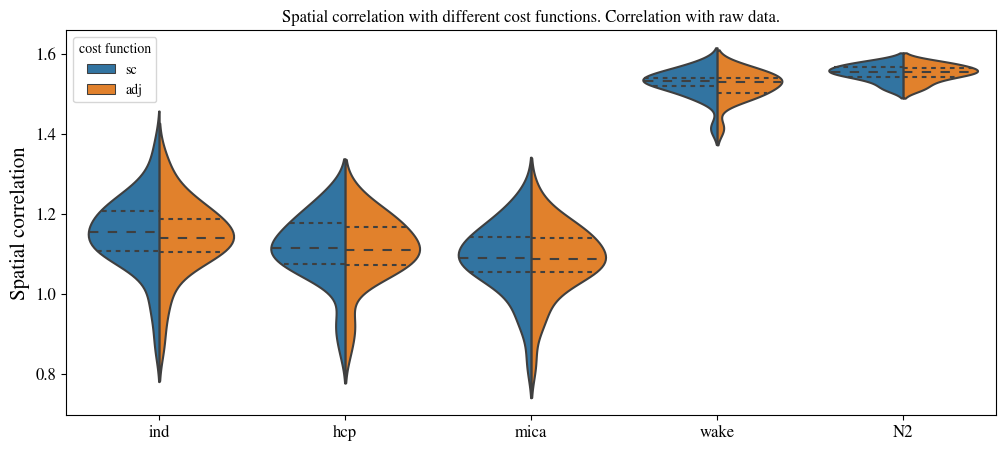

In [8]:
plt.figure(figsize=(12,5))
gfg = sns.violinplot(data=df_corrs, x="conn", y="sc_correlation", hue="costfunc", split=True, inner="quart")
gfg.legend(fontsize=10,title='cost function')
plt.xlabel('')
plt.ylabel('Spatial correlation', fontsize=15)
plt.title('Spatial correlation with different cost functions. Correlation with raw data.')
plt.show()

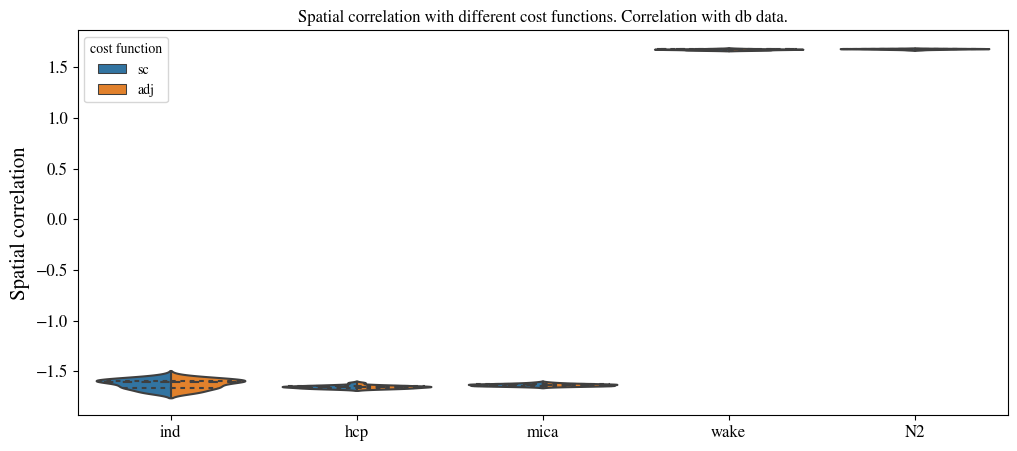

In [9]:
plt.figure(figsize=(12,5))
gfg = sns.violinplot(data=df_corrs, x="conn", y="sc_correlation_db", hue="costfunc", split=True, inner="quart")
gfg.legend(fontsize=10,title='cost function')
plt.xlabel('')
plt.ylabel('Spatial correlation', fontsize=15)
plt.title('Spatial correlation with different cost functions. Correlation with db data.')
plt.show()

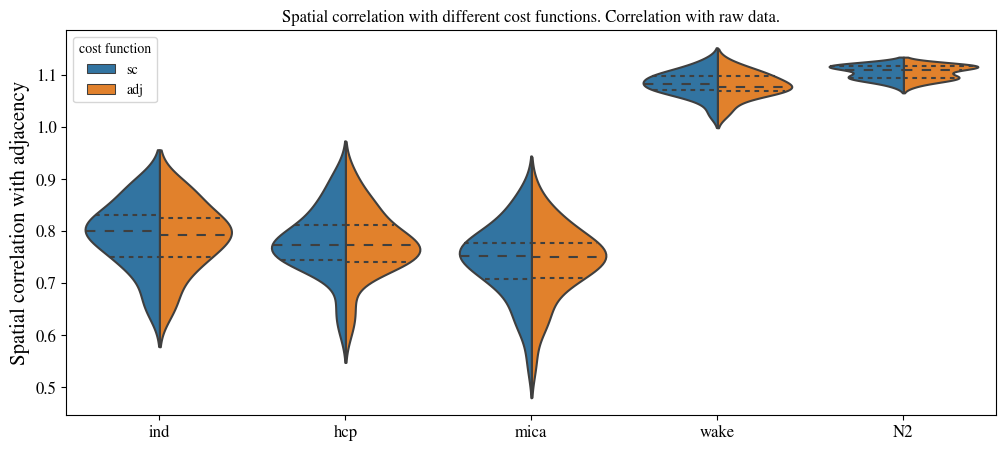

In [10]:
plt.figure(figsize=(12,5))
gfg = sns.violinplot(data=df_corrs, x="conn", y="adj_correlation", hue="costfunc", split=True, inner="quart")
gfg.legend(fontsize=10,title='cost function')
plt.xlabel('')
plt.ylabel('Spatial correlation with adjacency', fontsize=15)
plt.title('Spatial correlation with different cost functions. Correlation with raw data.')
plt.show()

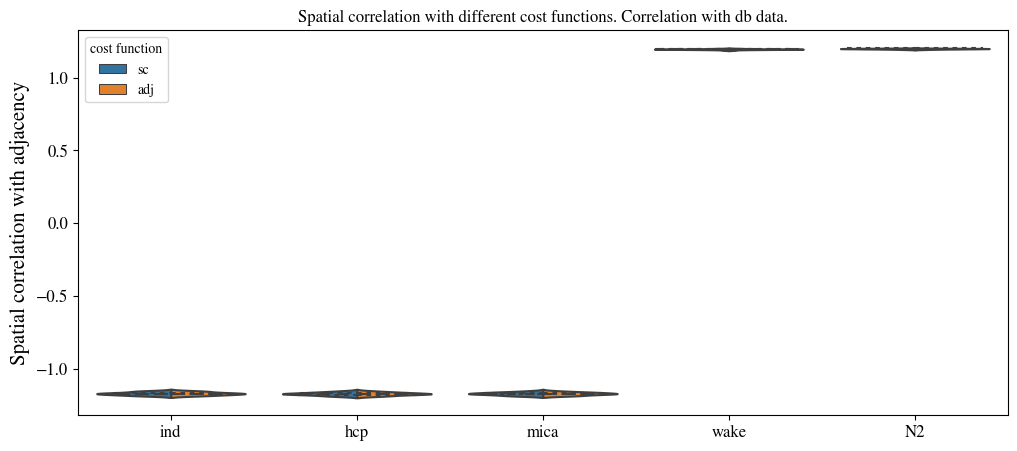

In [11]:
plt.figure(figsize=(12,5))
gfg = sns.violinplot(data=df_corrs, x="conn", y="adj_correlation_db", hue="costfunc", split=True, inner="quart")
gfg.legend(fontsize=10,title='cost function')
plt.xlabel('')
plt.ylabel('Spatial correlation with adjacency', fontsize=15)
plt.title('Spatial correlation with different cost functions. Correlation with db data.')
plt.show()

1.1427660373664827
0.06796860199342805
1.1137956761220942
-0.06066253021182611
0.784358286344176
-0.12477847100264208
0.7731100891997367
-0.2301267836455722


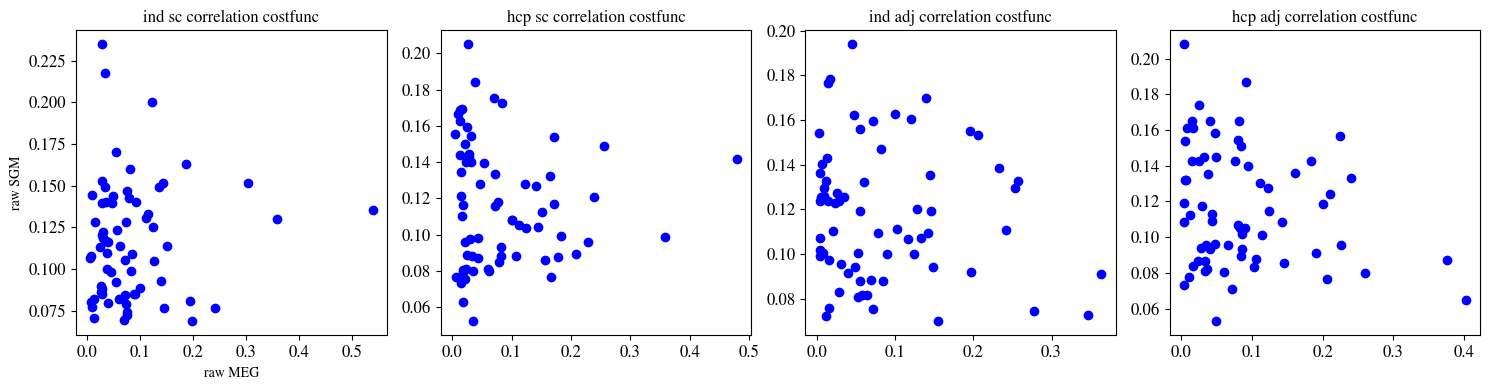

In [19]:
stimulus_roi = np.array([])
w_var = 1
w_means = 0

fig,ax = plt.subplots(1,4,figsize=(15,4))

# ind = np.argmax(df_microint_ind_oldcost["spatial"])
ind= min(range(len(df_orgsgm_ind_sc["spatial"])), key=lambda i: abs(df_orgsgm_ind_sc["spatial"][i] - np.mean(df_orgsgm_ind_sc["spatial"])))
print(df_orgsgm_ind_sc["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_ind_sc, stimulus_roi, w_var, w_means, "ind", "chang")


ax[0].scatter(summed_PSD, eigvec_ns_summed, color='b')
# ax[0][0].legend()
ax[0].set_title('ind sc correlation costfunc')
ax[0].set_xlabel('raw MEG')
ax[0].set_ylabel('raw SGM')
print(pearsonr(summed_PSD,eigvec_ns_summed)[0])

# ax[1][0].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')
# ax[1][0].set_xlabel('dB MEG')
# ax[1][0].set_ylabel('dB SGM')

ind= min(range(len(df_orgsgm_hcp_sc["spatial"])), key=lambda i: abs(df_orgsgm_hcp_sc["spatial"][i] - np.mean(df_orgsgm_hcp_sc["spatial"])))
print(df_orgsgm_hcp_sc["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_hcp_sc, stimulus_roi, w_var, w_means, "hcp", "chang")


ax[1].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[1].set_title('hcp sc correlation costfunc')
print(pearsonr(summed_PSD,eigvec_ns_summed)[0])

# ax[1][1].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')


ind= min(range(len(df_orgsgm_ind_adj["spatial"])), key=lambda i: abs(df_orgsgm_ind_adj["spatial"][i] - np.mean(df_orgsgm_ind_adj["spatial"])))
print(df_orgsgm_ind_adj["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_ind_adj, stimulus_roi, w_var, w_means, "ind", "chang")

ax[2].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[2].set_title('ind adj correlation costfunc')
print(pearsonr(summed_PSD,eigvec_ns_summed)[0])

# ax[1][2].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')

ind= min(range(len(df_orgsgm_hcp_adj["spatial"])), key=lambda i: abs(df_orgsgm_hcp_adj["spatial"][i] - np.mean(df_orgsgm_hcp_adj["spatial"])))
print(df_orgsgm_hcp_adj["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_hcp_adj, stimulus_roi, w_var, w_means, "hcp", "chang")

ax[3].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[3].set_title('hcp adj correlation costfunc')
print(pearsonr(summed_PSD,eigvec_ns_summed)[0])

# ax[1][3].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')

plt.tight_layout()

1.1498615120131872
0.03949055815252484
1.1139785236998876
-0.02404689137634268
0.787657794905586
0.003995710179784298
0.7757605789203506
-0.016887540711558596


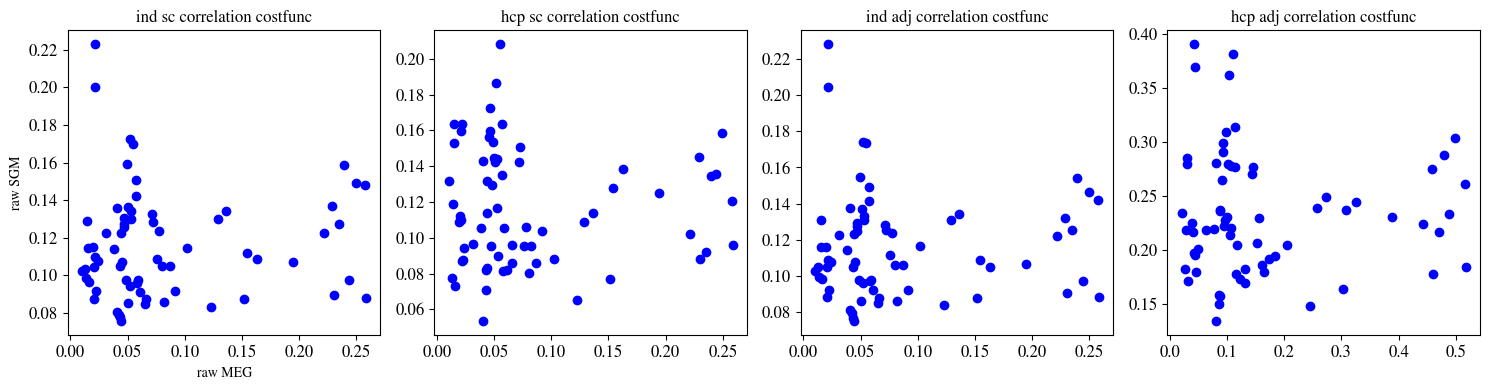

In [14]:
fig,ax = plt.subplots(1,4,figsize=(15,4))


print(np.mean(df_orgsgm_ind_sc["spatial"]))

nsubs = 36

summed_PSD_all = 0
eigvec_ns_summed_all = 0

for i in range(nsubs):
    _, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_ind_sc, stimulus_roi, w_var, w_means, "ind", "chang")
    summed_PSD_all += summed_PSD/nsubs
    eigvec_ns_summed_all += eigvec_ns_summed/nsubs

ax[0].scatter(summed_PSD_all, eigvec_ns_summed_all, color='b')
# ax[0][0].legend()
ax[0].set_title('ind sc correlation costfunc')
ax[0].set_xlabel('raw MEG')
ax[0].set_ylabel('raw SGM')
print(pearsonr(summed_PSD_all,eigvec_ns_summed_all)[0])

# ax[1][0].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')
# ax[1][0].set_xlabel('dB MEG')
# ax[1][0].set_ylabel('dB SGM')


print(np.mean(df_orgsgm_hcp_sc["spatial"]))

summed_PSD_all = 0
eigvec_ns_summed_all = 0

for i in range(nsubs):
    _, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_hcp_sc, stimulus_roi, w_var, w_means, "hcp", "chang")
    summed_PSD_all += summed_PSD/nsubs
    eigvec_ns_summed_all += eigvec_ns_summed/nsubs

ax[1].scatter(summed_PSD_all, eigvec_ns_summed_all, color='b')
ax[1].set_title('hcp sc correlation costfunc')
print(pearsonr(summed_PSD_all,eigvec_ns_summed_all)[0])

# ax[1][1].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')



print(np.mean(df_orgsgm_ind_adj["spatial"]))
summed_PSD_all = 0
eigvec_ns_summed_all = 0

for i in range(nsubs):
    _, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_ind_adj, stimulus_roi, w_var, w_means, "ind", "chang")
    summed_PSD_all += summed_PSD/nsubs
    eigvec_ns_summed_all += eigvec_ns_summed/nsubs
    
ax[2].scatter(summed_PSD_all, eigvec_ns_summed_all, color='b')
ax[2].set_title('ind adj correlation costfunc')
print(pearsonr(summed_PSD_all,eigvec_ns_summed_all)[0])

# ax[1][2].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')


print(np.mean(df_orgsgm_hcp_adj["spatial"]))

for i in range(nsubs):
    _, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_hcp_adj, stimulus_roi, w_var, w_means, "hcp", "chang")
    summed_PSD_all += summed_PSD/nsubs
    eigvec_ns_summed_all += eigvec_ns_summed/nsubs    

ax[3].scatter(summed_PSD_all, eigvec_ns_summed_all, color='b')
ax[3].set_title('hcp adj correlation costfunc')
print(pearsonr(summed_PSD_all,eigvec_ns_summed_all)[0])

# ax[1][3].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')

plt.tight_layout()

1.5271114422868237
-0.2320503548858005
1.5534468018345367
-0.03359599277551167
1.0799546513787344
-0.16466103384659347
1.1057846164263712
-0.21105807163149096


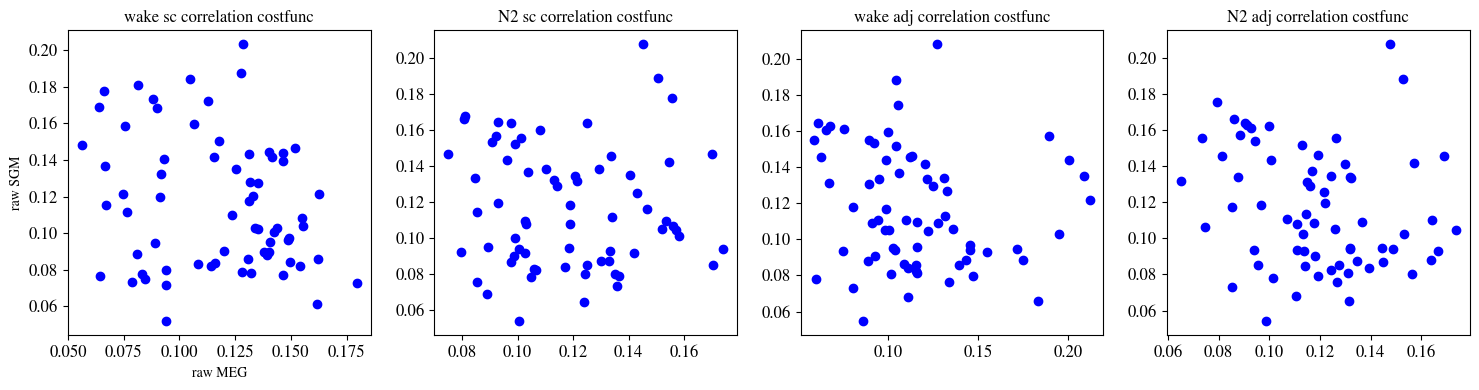

In [16]:
stimulus_roi = np.array([])
w_var = 1
w_means = 0

fig,ax = plt.subplots(1,4,figsize=(15,4))

# ind = np.argmax(df_microint_wake_oldcost["spatial"])
ind= min(range(len(df_orgsgm_wake_sc["spatial"])), key=lambda i: abs(df_orgsgm_wake_sc["spatial"][i] - np.mean(df_orgsgm_wake_sc["spatial"])))
print(df_orgsgm_wake_sc["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,ind,df_orgsgm_wake_sc, stimulus_roi, w_var, w_means, "hcp", "sleep")


ax[0].scatter(summed_PSD, eigvec_ns_summed, color='b')
# ax[0][0].legend()
ax[0].set_title('wake sc correlation costfunc')
ax[0].set_xlabel('raw MEG')
ax[0].set_ylabel('raw SGM')
print(pearsonr(summed_PSD,eigvec_ns_summed)[0])


# ax[1][0].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')
# ax[1][0].set_ylabel('dB')
# ax[1][0].set_xlabel('dB MEG')
# ax[1][0].set_ylabel('dB SGM')

# ind = np.argmax(df_microint_N2_oldcost["spatial"])
ind= min(range(len(df_orgsgm_N2_sc["spatial"])), key=lambda i: abs(df_orgsgm_N2_sc["spatial"][i] - np.mean(df_orgsgm_N2_sc["spatial"])))
print(df_orgsgm_N2_sc["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,ind,df_orgsgm_N2_sc, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[1].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[1].set_title('N2 sc correlation costfunc')
print(pearsonr(summed_PSD,eigvec_ns_summed)[0])

# ax[1][1].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')


# ind = np.argmin(df_microint_wake_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_wake_adj["spatial"])), key=lambda i: abs(df_orgsgm_wake_adj["spatial"][i] - np.mean(df_orgsgm_wake_adj["spatial"])))
print(df_orgsgm_wake_adj["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,ind,df_orgsgm_wake_adj, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[2].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[2].set_title('wake adj correlation costfunc')
print(pearsonr(summed_PSD,eigvec_ns_summed)[0])

# ax[1][2].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')

# ind = np.argmin(df_microint_N2_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_N2_adj["spatial"])), key=lambda i: abs(df_orgsgm_N2_adj["spatial"][i] - np.mean(df_orgsgm_N2_adj["spatial"])))
print(df_orgsgm_N2_adj["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,ind,df_orgsgm_N2_adj, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[3].scatter(summed_PSD, eigvec_ns_summed, color='b')
ax[3].set_title('N2 adj correlation costfunc')
print(pearsonr(summed_PSD,eigvec_ns_summed)[0])
    
# ax[1][3].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')

plt.tight_layout()

1.5271191853539898
-0.1420200591147693
1.5534953402329483
-0.17759227419185827
1.0796253937620344
-0.1532237080014678
1.1051474482381214
-0.16801442111359788


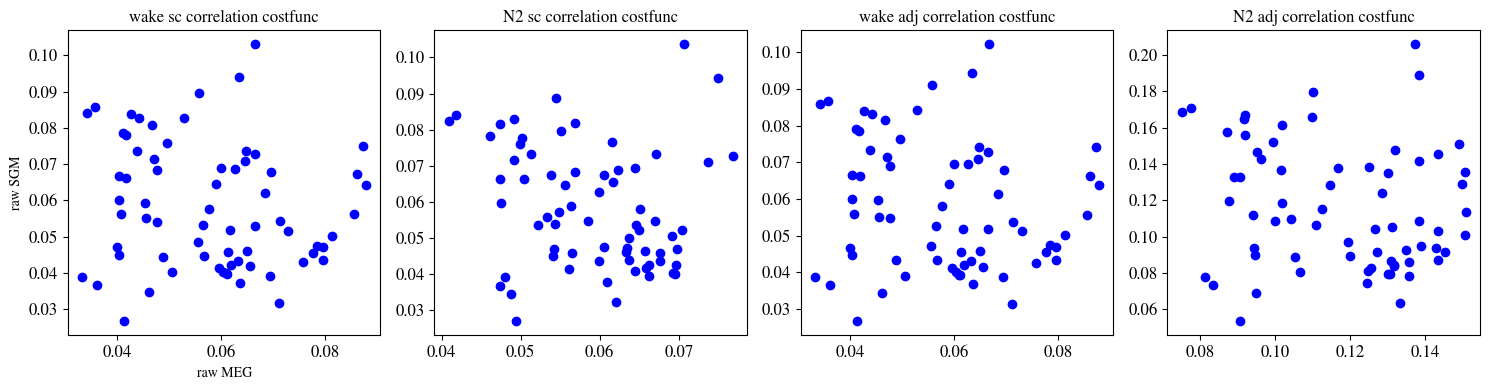

In [18]:
fig,ax = plt.subplots(1,4,figsize=(15,4))


print(np.mean(df_orgsgm_wake_sc["spatial"]))

nsubs_sleep = 18

summed_PSD_all = 0
eigvec_ns_summed_all = 0

for i in range(nsubs_sleep):
    _, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,i,df_orgsgm_wake_sc, stimulus_roi, w_var, w_means, "hcp", "sleep")
    summed_PSD_all += summed_PSD/nsubs
    eigvec_ns_summed_all += eigvec_ns_summed/nsubs

ax[0].scatter(summed_PSD_all, eigvec_ns_summed_all, color='b')
# ax[0][0].legend()
ax[0].set_title('wake sc correlation costfunc')
ax[0].set_xlabel('raw MEG')
ax[0].set_ylabel('raw SGM')
print(pearsonr(summed_PSD_all,eigvec_ns_summed_all)[0])

# ax[1][0].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')
# ax[1][0].set_xlabel('dB MEG')
# ax[1][0].set_ylabel('dB SGM')


print(np.mean(df_orgsgm_N2_sc["spatial"]))

summed_PSD_all = 0
eigvec_ns_summed_all = 0

for i in range(nsubs_sleep):
    _, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,i,df_orgsgm_N2_sc, stimulus_roi, w_var, w_means, "hcp", "sleep")
    summed_PSD_all += summed_PSD/nsubs
    eigvec_ns_summed_all += eigvec_ns_summed/nsubs

ax[1].scatter(summed_PSD_all, eigvec_ns_summed_all, color='b')
ax[1].set_title('N2 sc correlation costfunc')
print(pearsonr(summed_PSD_all,eigvec_ns_summed_all)[0])

# ax[1][1].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')



print(np.mean(df_orgsgm_wake_adj["spatial"]))
summed_PSD_all = 0
eigvec_ns_summed_all = 0

for i in range(nsubs_sleep):
    _, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,i,df_orgsgm_wake_adj, stimulus_roi, w_var, w_means, "hcp", "sleep")
    summed_PSD_all += summed_PSD/nsubs
    eigvec_ns_summed_all += eigvec_ns_summed/nsubs
    
ax[2].scatter(summed_PSD_all, eigvec_ns_summed_all, color='b')
ax[2].set_title('wake adj correlation costfunc')
print(pearsonr(summed_PSD_all,eigvec_ns_summed_all)[0])

# ax[1][2].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')


print(np.mean(df_orgsgm_N2_adj["spatial"]))

for i in range(nsubs_sleep):
    _, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,i,df_orgsgm_N2_adj, stimulus_roi, w_var, w_means, "hcp", "sleep")
    summed_PSD_all += summed_PSD/nsubs
    eigvec_ns_summed_all += eigvec_ns_summed/nsubs    

ax[3].scatter(summed_PSD_all, eigvec_ns_summed_all, color='b')
ax[3].set_title('N2 adj correlation costfunc')
print(pearsonr(summed_PSD_all,eigvec_ns_summed_all)[0])

# ax[1][3].scatter(summed_PSD_db, eigvec_ns_summed_db, color='b')

plt.tight_layout()

0.6601622449397062
0.659108831190568
0.2908007949060487
0.29078943067142


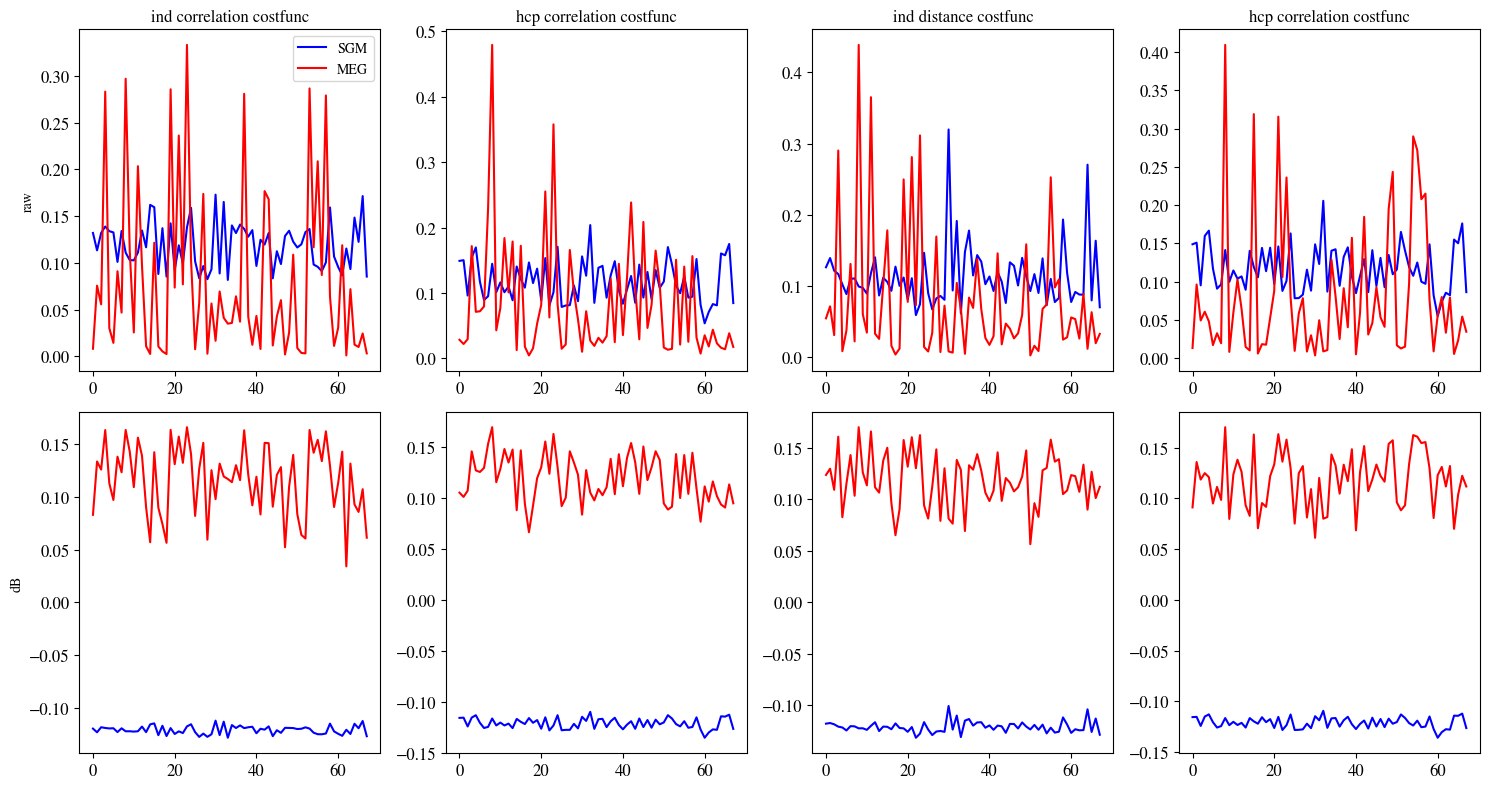

In [14]:
stimulus_roi = np.array([])
w_var = 1
w_means = 0

fig,ax = plt.subplots(2,4,figsize=(15,8))

# ind = np.argmax(df_microint_ind_oldcost["spatial"])
ind= min(range(len(df_orgsgm_ind_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_ind_oldcost["spatial"][i] - np.mean(df_orgsgm_ind_oldcost["spatial"])))
print(df_orgsgm_ind_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_ind_oldcost, stimulus_roi, w_var, w_means, "ind", "chang")

ax[0][0].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][0].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][0].legend()
ax[0][0].set_title('ind correlation costfunc')
ax[0][0].set_ylabel('raw')

ax[1][0].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][0].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][0].set_ylabel('dB')

# ind = np.argmax(df_microint_hcp_oldcost["spatial"])
ind= min(range(len(df_orgsgm_hcp_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_hcp_oldcost["spatial"][i] - np.mean(df_orgsgm_hcp_oldcost["spatial"])))
print(df_orgsgm_hcp_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_hcp_oldcost, stimulus_roi, w_var, w_means, "hcp", "chang")

ax[0][1].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][1].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][1].set_title('hcp correlation costfunc')

ax[1][1].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][1].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')


# ind = np.argmin(df_microint_ind_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_ind_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_ind_mahalanobis["spatial"][i] - np.mean(df_orgsgm_ind_mahalanobis["spatial"])))
print(df_orgsgm_ind_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,i,df_orgsgm_ind_mahalanobis, stimulus_roi, w_var, w_means, "ind", "chang")

ax[0][2].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][2].plot(rois_with_MEG, summed_PSD, color='r',label='MEG') 
ax[0][2].set_title('ind distance costfunc')

ax[1][2].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][2].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')

# ind = np.argmin(df_microint_hcp_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_hcp_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_hcp_mahalanobis["spatial"][i] - np.mean(df_orgsgm_hcp_mahalanobis["spatial"])))
print(df_orgsgm_hcp_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,ind_psd,rois_with_MEG,fvec,ind,df_orgsgm_hcp_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "chang")

ax[0][3].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][3].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][3].set_title('hcp correlation costfunc')
    
ax[1][3].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][3].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')

plt.tight_layout()

0.9128745491006817
0.9283521535820479
0.14656762957747685
0.1321463741621947


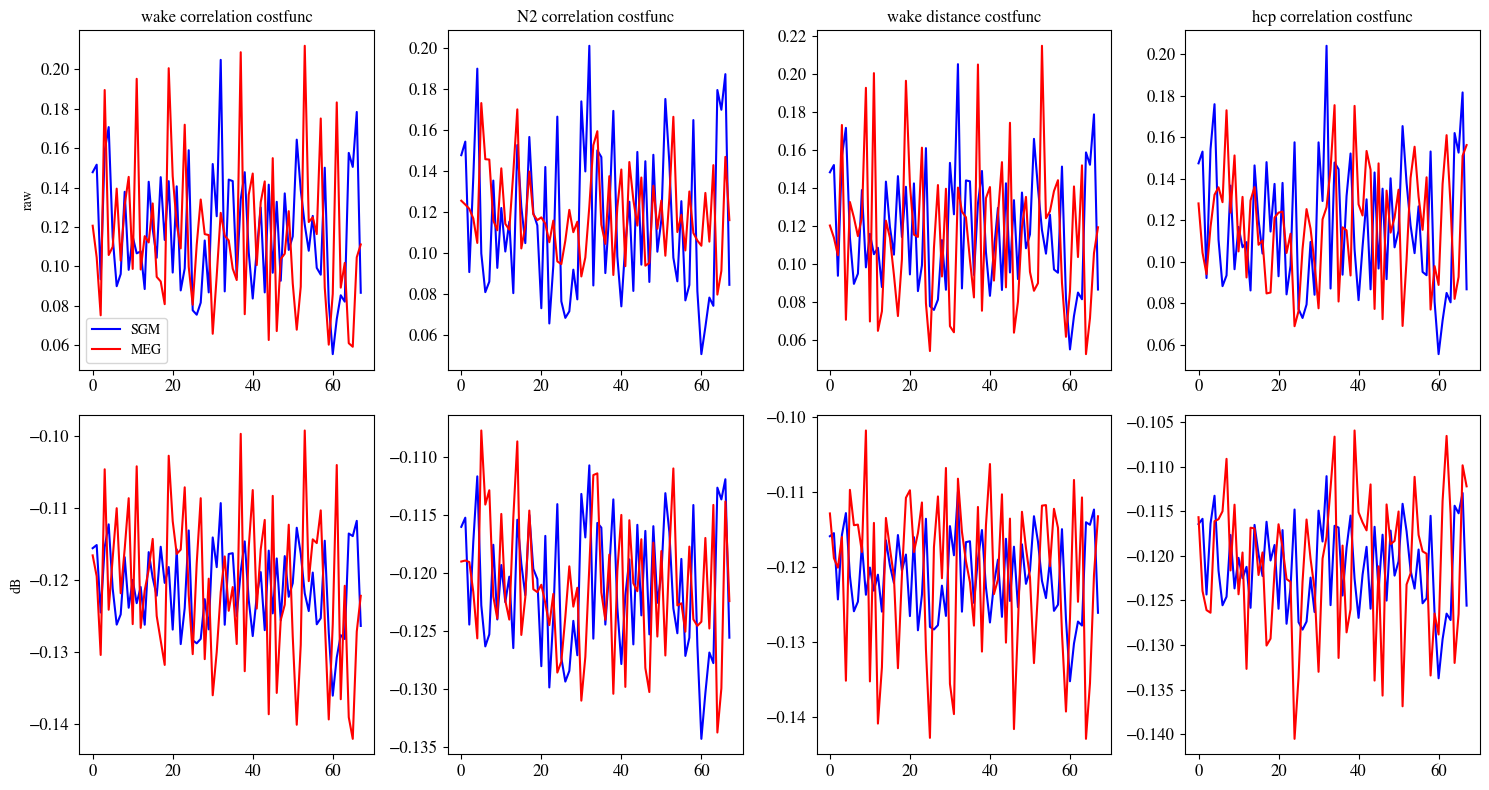

In [15]:
stimulus_roi = np.array([])
w_var = 1
w_means = 0

fig,ax = plt.subplots(2,4,figsize=(15,8))

# ind = np.argmax(df_microint_wake_oldcost["spatial"])
ind= min(range(len(df_orgsgm_wake_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_wake_oldcost["spatial"][i] - np.mean(df_orgsgm_wake_oldcost["spatial"])))
print(df_orgsgm_wake_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,ind,df_orgsgm_wake_oldcost, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[0][0].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][0].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][0].legend()
ax[0][0].set_title('wake correlation costfunc')
ax[0][0].set_ylabel('raw')

ax[1][0].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][0].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')
ax[1][0].set_ylabel('dB')

# ind = np.argmax(df_microint_N2_oldcost["spatial"])
ind= min(range(len(df_orgsgm_N2_oldcost["spatial"])), key=lambda i: abs(df_orgsgm_N2_oldcost["spatial"][i] - np.mean(df_orgsgm_N2_oldcost["spatial"])))
print(df_orgsgm_N2_oldcost["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,ind,df_orgsgm_N2_oldcost, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[0][1].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][1].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][1].set_title('N2 correlation costfunc')

ax[1][1].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][1].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')


# ind = np.argmin(df_microint_wake_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_wake_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_wake_mahalanobis["spatial"][i] - np.mean(df_orgsgm_wake_mahalanobis["spatial"])))
print(df_orgsgm_wake_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_wake,rois_with_MEG,fvec_sleep,i,df_orgsgm_wake_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[0][2].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][2].plot(rois_with_MEG, summed_PSD, color='r',label='MEG') 
ax[0][2].set_title('wake distance costfunc')

ax[1][2].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][2].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')

# ind = np.argmin(df_microint_N2_mahalanobis["spatial"])
ind= min(range(len(df_orgsgm_N2_mahalanobis["spatial"])), key=lambda i: abs(df_orgsgm_N2_mahalanobis["spatial"][i] - np.mean(df_orgsgm_N2_mahalanobis["spatial"])))
print(df_orgsgm_N2_mahalanobis["spatial"][ind])

_, _, _, _, eigvec_ns_summed, summed_PSD, eigvec_ns_summed_db, summed_PSD_db = getpsd(ind_conn,psd_N2,rois_with_MEG,fvec_sleep,ind,df_orgsgm_N2_mahalanobis, stimulus_roi, w_var, w_means, "hcp", "sleep")

ax[0][3].plot(rois_with_MEG, eigvec_ns_summed, color='b',label='SGM')
ax[0][3].plot(rois_with_MEG, summed_PSD, color='r',label='MEG')
ax[0][3].set_title('hcp correlation costfunc')
    
ax[1][3].plot(rois_with_MEG, eigvec_ns_summed_db, color='b',label='SGM')
ax[1][3].plot(rois_with_MEG, summed_PSD_db, color='r',label='MEG')

plt.tight_layout()